In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data (replace 'iphones.csv' with your file path)
df = pd.read_csv(r'C:\Users\hp\Desktop\excel sheets\Mobiles Dataset (2025).csv', encoding='ISO-8859-1')

# Function to split Back Cam into Min and Max
def split_back_cam(cam_str):
    if pd.isna(cam_str):  # Handle missing values
        return pd.Series([np.nan, np.nan])
    cam_str = str(cam_str).replace('MP', '').strip()
    if '/' in cam_str:
        cams = [int(x) for x in cam_str.split('/')[0].split('+') if x.strip().isdigit()]
        if cams:
            return pd.Series([min(cams), max(cams)])
        return pd.Series([np.nan, np.nan])
    elif cam_str.isdigit():
        return pd.Series([int(cam_str), int(cam_str)])
    return pd.Series([np.nan, np.nan])

# Apply the function to create two new columns
df[['Back Cam Min', 'Back Cam Max']] = df['Back Camera'].apply(split_back_cam)

# Drop the original 'Back Cam' column
df = df.drop(columns=['Back Camera'])
# Clean the Front Cam column by removing 'MP', '/', and '4K'
df['Front Camera'] = df['Front Camera'].str.replace('MP', '', regex=False).str.replace('/', '', regex=False).str.replace('4K', '', regex=False).str.replace(' ', '', regex=False)
df['Front Camera'] = pd.to_numeric(df['Front Camera'], errors='coerce')



In [18]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
numeric_columns = [col for col in df.columns if col not in ['Company', 'Model Name', 'Processor', 'Launched Year', 'Front Cam', 'Back Cam Min', 'Back Cam Max']]

for col in numeric_columns:
    # Check if the column is of object (string) type before applying .str
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(r'[^\d.]', '', regex=True), errors='coerce')
    else:
        # If the column is already numeric, convert it directly (no need for .str)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Save the cleaned data to a new CSV
df.head()


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Back Cam Min,Back Cam Max
0,NaN,iPhone 16 128GB,174.0,6.0,12.0,A17 Bionic,3600,6.1,224999.0,79999,5799,799.0,2799,2024,48.0,48.0
1,NaN,iPhone 16 256GB,174.0,6.0,12.0,A17 Bionic,3600,6.1,234999.0,84999,6099,849.0,2999,2024,48.0,48.0
2,NaN,iPhone 16 512GB,174.0,6.0,12.0,A17 Bionic,3600,6.1,244999.0,89999,6499,899.0,3199,2024,48.0,48.0
3,NaN,iPhone 16 Plus 128GB,203.0,6.0,12.0,A17 Bionic,4200,6.7,249999.0,89999,6199,899.0,3199,2024,48.0,48.0
4,NaN,iPhone 16 Plus 256GB,203.0,6.0,12.0,A17 Bionic,4200,6.7,259999.0,94999,6499,949.0,3399,2024,48.0,48.0


In [14]:
# Check for missing values
print(df.isnull().sum())

# Display basic statistics
print(df.describe())

# Check data types
print(df.dtypes)

Company Name                   0
Model Name                     0
Mobile Weight                  0
RAM                            0
Front Camera                  14
Processor                      0
Battery Capacity               0
Screen Size                    0
Launched Price (Pakistan)      0
Launched Price (India)         0
Launched Price (China)         0
Launched Price (USA)           0
Launched Price (Dubai)         0
Launched Year                  0
Back Cam Min                 426
Back Cam Max                 426
dtype: int64
       Front Camera  Launched Year  Back Cam Min  Back Cam Max
count    916.000000     930.000000    504.000000    504.000000
mean      17.910044    2023.161290     46.097222     46.097222
std       11.567545      29.629971     31.921444     31.921444
min        2.000000    2014.000000      5.000000      5.000000
25%        8.000000    2021.000000     13.000000     13.000000
50%       16.000000    2023.000000     50.000000     50.000000
75%       32.00000

In [53]:
# Group by Model Name and calculate average features

model_summary = df.groupby('Model Name').agg({
    'RAM': 'mean',
    'Front Camera':'mean',
    'Back Cam Max': 'mean',
    'Battery Capacity': 'mean',
    'Launched Price (India)': 'mean'
}).sort_values(by='Launched Price (India)',ascending=False)

print("Top 5 Most Expensive Models by Average Price (USD):")
print(model_summary.head())




Top 5 Most Expensive Models by Average Price (USD):
                RAM  Front Camera  Back Cam Max  Battery Capacity  \
Model Name                                                          
Mate XT 512GB  12.0          13.0           NaN            5000.0   
Mate XT 256GB  12.0          13.0           NaN            5000.0   
Mate X6        12.0           8.0           NaN            4800.0   
Mate X2         8.0          16.0          50.0            4500.0   
Mate X3        12.0           8.0           NaN            4800.0   

               Launched Price (India)  
Model Name                             
Mate XT 512GB                274999.0  
Mate XT 256GB                259999.0  
Mate X6                      249999.0  
Mate X2                      249999.0  
Mate X3                      249999.0  


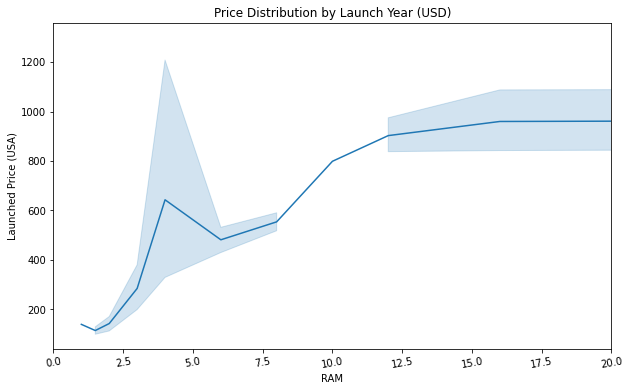

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame for demonstration (replace this with your actual DataFrame)

# Plot price distribution (e.g., in USD if available)
plt.figure(figsize=(10, 6))
sns.lineplot(x='RAM', y='Launched Price (USA)', data=df)
plt.title('Price Distribution by Launch Year (USD)')
plt.xticks(rotation=10)

# Set x-axis limits
plt.xlim(0, 20)

plt.show()



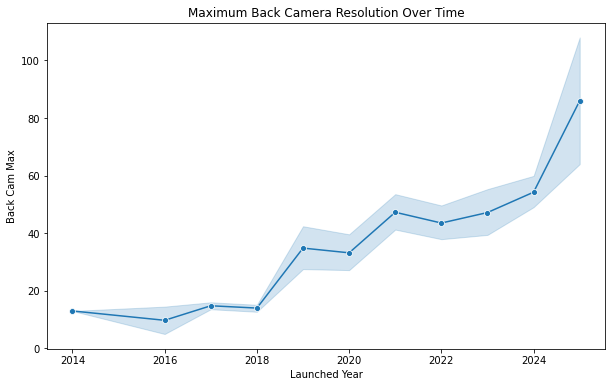

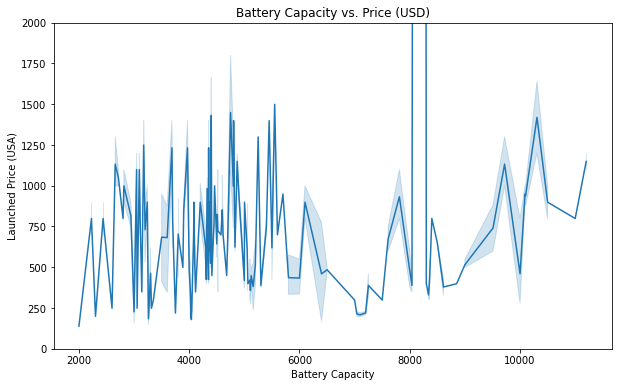

In [39]:
# Plot Back Cam Max vs. Launch Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Launched Year', y='Back Cam Max', data=df, marker='o')
plt.title('Maximum Back Camera Resolution Over Time')
plt.show()

# Plot Battery vs. Price
plt.figure(figsize=(10, 6))
sns.lineplot(x='Battery Capacity', y='Launched Price (USA)', data=df)
plt.title('Battery Capacity vs. Price (USD)')
plt.ylim(0, 2000)
plt.show()

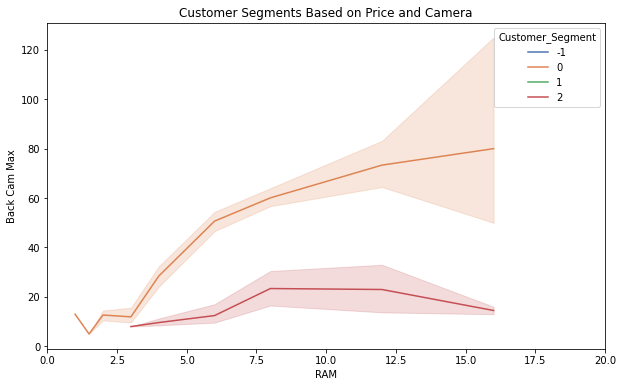

In [47]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering and keep track of the index
features = df[['RAM', 'Back Cam Max', 'Battery Capacity', 'Launched Price (USA)']].dropna()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# Create a Series with the clusters, using the index of 'features'
cluster_series = pd.Series(clusters, index=features.index)

# Map the clusters back to the original DataFrame using the index
df['Customer_Segment'] = df.index.map(cluster_series)

# Fill any missing values (NaN) in Customer_Segment with a default value (e.g., -1 for unassigned)
df['Customer_Segment'] = df['Customer_Segment'].fillna(-1).astype(int)

# Visualize clusters (only for rows where clusters exist, i.e., non-NaN in features)
plt.figure(figsize=(10, 6))
sns.lineplot(x='RAM', y='Back Cam Max', hue='Customer_Segment', data=df, palette='deep')
plt.title('Customer Segments Based on Price and Camera')
plt.xlim(0, 20)
plt.show()